<a href="https://colab.research.google.com/github/RD191295/Tensorflow_Tutorials/blob/main/01_nerual_network_regression_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Nerual Networks in Tensorflow


There are Many defination for a regression problem but in our case we are going to simplify it: predicting  a numerical variable based on som other combination of variables , even shorter... predicting number

In [1]:
# Import tensorflow
import tensorflow as tf
print(tf.__version__)

2.8.2


# Creating data to view and fit

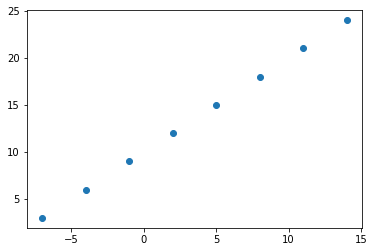

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# create features
x = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(x, y)

## Input and Output shapes

In [3]:
# create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price                         

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [4]:
x[0], y[0]

(-7.0, 3.0)

In [5]:
x[1], y[1]

(-4.0, 6.0)

In [6]:
input_shape = x.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [7]:
# Turn our Numpy array into tensors
X = tf.constant(x)
y = tf.constant(y)
x, y

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.]),
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

## steps in modeling with Tensorflow

1. **creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.

2. **compiling a model** - define the loss function( in other words , the function which tells our model how wrong it is) and the optimizer ( tells our model how to improve the patterns its learning) and evaluation metrics ( what we can use to interpret the performance of our model)

3. **Fitting a model**- letting the model try to find patterns between x & y

In [8]:
# set random seed
tf.random.set_seed(42)

# 1. Build model using the sequential API

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
# 2. compile the model

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X,axis = -1),y, epochs = 25)

Epoch 1/25
1/1 [==============================] - 1s 553ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/25
1/1 [==============================] - 0s 6ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/25
1/1 [==============================] - 0s 7ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/25
1/1 [==============================] - 0s 6ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/25
1/1 [==============================] - 0s 6ms/step - loss: 10.9748 - mae: 10.9748
Epoch 6/25
1/1 [==============================] - 0s 10ms/step - loss: 10.8423 - mae: 10.8423
Epoch 7/25
1/1 [==============================] - 0s 10ms/step - loss: 10.7098 - mae: 10.7098
Epoch 8/25
1/1 [==============================] - 0s 9ms/step - loss: 10.5773 - mae: 10.5773
Epoch 9/25
1/1 [==============================] - 0s 8ms/step - loss: 10.4448 - mae: 10.4448
Epoch 10/25
1/1 [==============================] - 0s 11ms/step - loss: 10.3123 - mae: 10.3123
Epoch 11/25
1/1 [==============================] - 0s 6ms/step -

In [9]:
# check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [10]:
# Try and make prediction using our model
model.predict([17.0])

array([[24.816017]], dtype=float32)

## Improve Model

We can imporve our model , by altering the steps we took to create model.

1. **Creating a Model** - we might add more layers, increase the number of hidden units( all called neurons) within each of the hidden layers, change the activation function of each layer.

2. **compiling model** - here we might change optimization function or perhaps the lerning rate of the optimization function.

3. **Fitting model** - here we might fit a model for more epochs (leave it training for longer) or on more data(give the model more examples to learn from)

In [11]:
# 1. Build model using the sequential API

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 64 , activation = "relu"),
    tf.keras.layers.Dense(units = 32, activation = "relu"),
    tf.keras.layers.Dense(units = 16, activation = "relu"),
    tf.keras.layers.Dense(1)
])
# 2. compile the model

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(lr = 0.01),
              metrics = ["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X,axis = -1),y, epochs = 100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 1s 616ms/step - loss: 12.5606 - mae: 12.5606
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 11.2003 - mae: 11.2003
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 10.0089 - mae: 10.0089
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 8.4663 - mae: 8.4663
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 6.4502 - mae: 6.4502
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 4.0821 - mae: 4.0821
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 4.3891 - mae: 4.3891
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 5.2313 - mae: 5.2313
Epoch 9/100
1/1 [==============================] - 0s 20ms/step - loss: 5.3820 - mae: 5.3820
Epoch 10/100
1/1 [==============================] - 0s 15ms/step - loss: 5.0437 - mae: 5.0437
Epoch 11/100
1/1 [==============================] - 0s 10ms/step - loss: 4.4166 -

In [12]:
# Try and make prediction using our model
model.predict([17.0])

array([[28.058153]], dtype=float32)

In [13]:
# check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

## Evaluting a model

In Practice a typical workflow you will go through when building nerual network is :

Build Model --> Fit it --> Evalute It -->tweak a model -> fit it --> evalute it -->tweak a model 

In [14]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [15]:
# Make labels for the dataset
Y = X +10
Y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

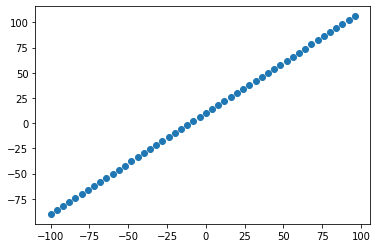

In [16]:
# Visalize Dataset
import matplotlib.pyplot as plt
plt.scatter(X, Y)

### The 3 sets....

* **Training Set** - the model learns from this data , which is typically 70-80% of the total data you have available.

* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the data avilable.

* **Test set** - the model gets evaluted on this data to test what is has learned , this set is typically 10-15% of the total data available.

In [17]:
# check the length of how many samples we have
len(X)

50

In [18]:
# split the data into train and test sets
X_train = X[:40]
Y_train = Y[:40]
X_test = X[40:]
Y_test = Y[40:]

len(X_train), len(X_test), len(Y_train), len(Y_test)

(40, 10, 40, 10)

## Visalizing data
Now we have got our data in training and test sets...let's visualize it again!!


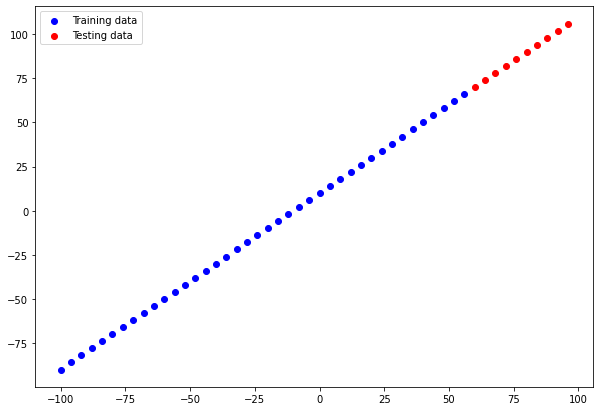

In [19]:
plt.figure(figsize = (10,7))
# Plot training data in blue
plt.scatter(X_train, Y_train, c="b", label = "Training data")
# Plot training data in red
plt.scatter(X_test, Y_test, c="r", label = "Testing data")
plt.legend()
plt.show()

In [63]:
# Let's have a look at building nerual network for our data

# 1. Build model using the sequential API

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape = (1,),name = "input_layer"),
    tf.keras.layers.Dense(16,name = "hidden_layer"),

    tf.keras.layers.Dense(1,name = "output_layer")
])

# 2. compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(lr = 0.01),
              metrics = ["mae","mse"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


## Model Summary

In [64]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 1)                 2         
                                                                 
 hidden_layer (Dense)        (None, 16)                32        
                                                                 
 output_layer (Dense)        (None, 1)                 17        
                                                                 
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


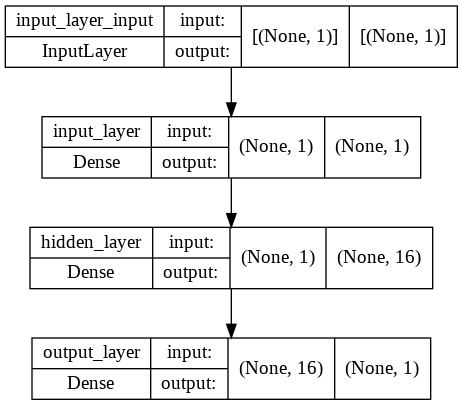

In [65]:
from tensorflow.keras.utils import plot_model

plot_model(model = model, show_shapes = True)

In [66]:
# Train model
# 3. Fit the model
model.fit(X_train,Y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 67.0070 - mae: 67.0070 - mse: 6188.2910
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 55.3763 - mae: 55.3763 - mse: 4228.9839
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 44.7873 - mae: 44.7873 - mse: 2739.8318
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 34.3877 - mae: 34.3877 - mse: 1606.0645
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 24.5109 - mae: 24.5109 - mse: 817.8645
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 14.9569 - mae: 14.9569 - mse: 307.1346
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 8.2377 - mae: 8.2377 - mse: 94.9081
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 12.5371 - mae: 12.5371 - mse: 181.5878
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 14.2293 - mae: 14.2293 - mse: 278.7420
Epoch 10/

### Visualizing our model's predictions

In [67]:
# Make some predictions

y_pred = model.predict(X_test)
y_pred

array([[ 68.73078 ],
       [ 72.65626 ],
       [ 76.58172 ],
       [ 80.50719 ],
       [ 84.43266 ],
       [ 88.35813 ],
       [ 92.2836  ],
       [ 96.20907 ],
       [100.13454 ],
       [104.060005]], dtype=float32)

In [68]:
Y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

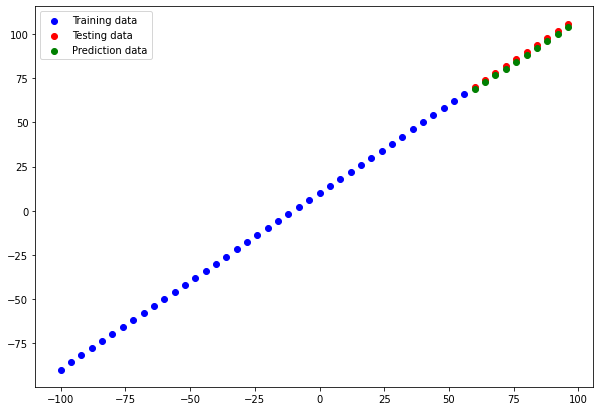

In [69]:
# Let's create a plotting function

def plot_prediction(train_data = X_train,
                     train_labels = Y_train,
                     test_data = X_test,
                     test_labels = Y_test,
                     predictions = y_pred):
  """
  Plots training data ,testing data and prediction data to compare it with grounftruth labels
  """
  plt.figure(figsize = (10, 7))
  # Plot training data in blue
  plt.scatter(X_train, Y_train, c="b", label = "Training data")
  # Plot testing data in red
  plt.scatter(X_test, Y_test, c="r", label = "Testing data")
  # Plot testing data in red
  plt.scatter(X_test, y_pred, c="g", label = "Prediction data")
  plt.legend()
  plt.show()

plot_prediction()

### EValuting our model's prediction with regression evalution metrics

In [72]:
# Evaluate the model on the test
model.evaluate(X_test,Y_test)

1/1 [==============================] - 0s 153ms/step - loss: 1.6046 - mae: 1.6046 - mse: 2.6206


[1.6046035289764404, 1.6046035289764404, 2.6205806732177734]

In [77]:
# Calculate the mean absolute error
tf.metrics.mean_absolute_error(Y_test, tf.squeeze(tf.constant(y_pred)))

<tf.Tensor: shape=(), dtype=float32, numpy=1.6046051>

In [78]:
# Calculate the mean square error
tf.metrics.mean_squared_error(Y_test, tf.squeeze(tf.constant(y_pred)))

<tf.Tensor: shape=(), dtype=float32, numpy=2.620585>

In [82]:
# Callculate the metrics 
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true, tf.squeeze(tf.constant(y_pred)))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true, tf.squeeze(tf.constant(y_pred)))